## 任务
1.基于examdata.csv数据，建立逻辑回归模型，评估模型表现；

2.预测Exam1=75,Exam2=60时，该同学能否通过Exam3

3.建立二阶边界函数，重复任务1，2

In [1]:
import pandas as pd  # 导入pandas库用于数据处理
import numpy as np  # 导入numpy库用于数值计算
data = pd.read_csv("examdata.csv")  # 从CSV文件中读取数据
data.head()  # 显示数据的前五行

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


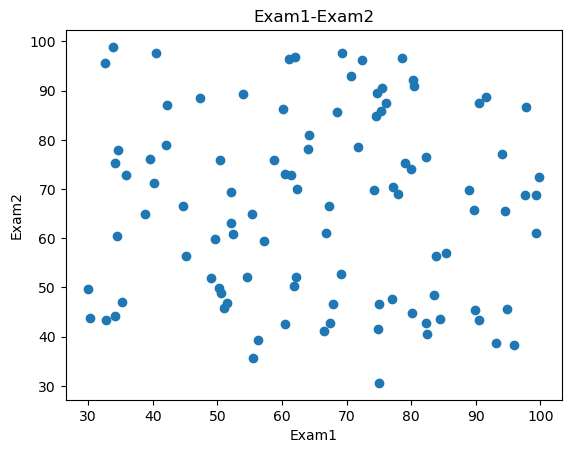

In [45]:
%matplotlib inline  
# 在Jupyter Notebook中内嵌显示图表

from matplotlib import pyplot as plt  # 导入matplotlib.pyplot库用于绘图
fig1 = plt.figure()  # 创建一个新的图表
plt.scatter(data.loc[:,"Exam1"],data.loc[:,"Exam2"])  # 绘制Exam1和Exam2的散点图
plt.title("Exam1-Exam2")  # 设置图表标题
plt.xlabel("Exam1")  # 设置X轴标签
plt.ylabel("Exam2")  # 设置Y轴标签
plt.show()  # 显示图表

In [46]:
mask = data.loc[:,"Pass"]==1  # 创建一个布尔掩码，标记通过考试的行
print(mask)  # 打印掩码

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


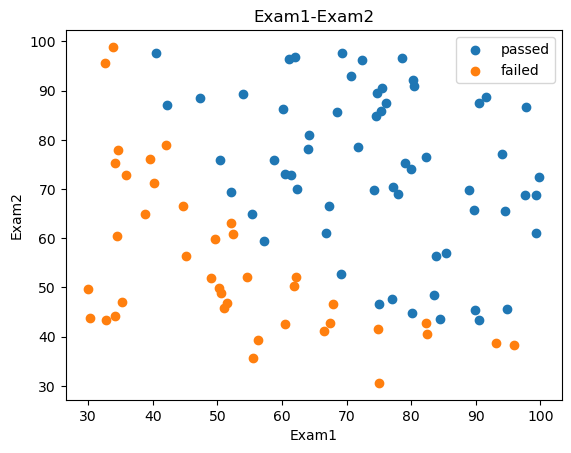

In [47]:
from matplotlib import pyplot as plt
fig2 = plt.figure()  # 创建一个新的图表
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])  # 绘制通过考试的散点图
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])  # 绘制未通过考试的散点图
plt.title("Exam1-Exam2")  # 设置图表标题
plt.xlabel("Exam1")  # 设置X轴标签
plt.ylabel("Exam2")  # 设置Y轴标签
plt.legend((passed, failed),("passed", "failed"))  # 添加图例
plt.show()  # 显示图表

In [48]:
x = data.drop(["Pass"] , axis = 1)  # 去除Pass列，只保留Exam1和Exam2列
y = data.loc[: , "Pass"]  # 获取Pass列作为目标变量
x1 = data.loc[:,"Exam1"]  # 获取Exam1列
x2 = data.loc[:,"Exam2"]  # 获取Exam2列

In [49]:
print(x.shape,y.shape)  # 打印自变量和目标变量的形状

(100, 2) (100,)


In [50]:
from sklearn.linear_model import LogisticRegression  # 从sklearn.linear_model导入LogisticRegression类
lr = LogisticRegression()  # 创建逻辑回归模型
lr.fit(x,y)  # 训练逻辑回归模型

LogisticRegression()

In [51]:
y_predict = lr.predict(x)  # 预测训练集的结果
print(y_predict)  # 打印预测结果

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [52]:
from sklearn.metrics import accuracy_score  # 从sklearn.metrics导入accuracy_score函数
accuracy = accuracy_score(y , y_predict)  # 计算准确度
print(accuracy)  # 打印准确度

0.89


In [53]:
y_test = lr.predict([[70,65]])  # 预测单个样本的结果
print("passed" if y_test == 1 else "failed")  # 打印预测结果

passed


C:\Users\Nurbek\anaconda3_new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
print(lr.coef_)  # 打印模型的系数
print(lr.intercept_)  # 打印模型的截距

[[0.20535491 0.2005838 ]]
[-25.05219314]


In [55]:
theta0 = lr.intercept_  # 获取模型的截距
theta1,theta2 = lr.coef_[0][0],lr.coef_[0][1]  # 获取模型的系数
print(theta0,theta1,theta2)  # 打印截距和系数

[-25.05219314] 0.20535491217790394 0.2005838039546906


In [56]:
x2_new = -(theta0 + theta1*x1)/theta2  # 计算决策边界
print(x2_new)  # 打印决策边界

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


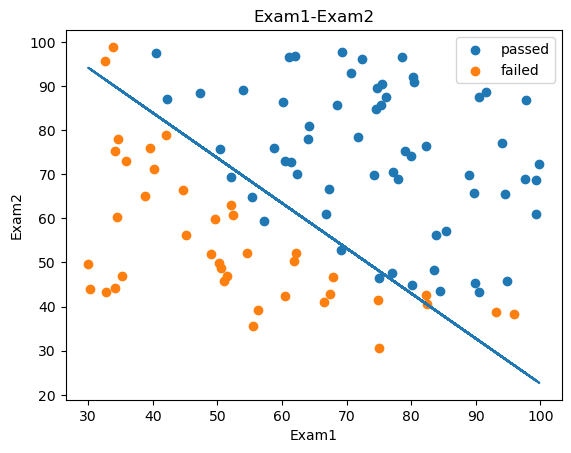

In [57]:
fig3 = plt.figure()  # 创建一个新的图表
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])  # 绘制通过考试的散点图
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])  # 绘制未通过考试的散点图
plt.plot(x1 , x2_new)  # 绘制决策边界
plt.title("Exam1-Exam2")  # 设置图表标题
plt.xlabel("Exam1")  # 设置X轴标签
plt.ylabel("Exam2")  # 设置Y轴标签
plt.legend((passed, failed),("passed", "failed"))  # 添加图例
plt.show()  # 显示图表

In [58]:
x1_2 = x1*x1  # 计算Exam1的平方
x2_2 = x2*x2  # 计算Exam2的平方
x1_x2 = x1*x2  # 计算Exam1和Exam2的乘积
x_new = {"x1":x1 , "x2":x2 , "x1_2":x1_2 , "x2_2":x2_2 , "x1_x2":x1_x2}  # 创建新的特征集合
x_new = pd.DataFrame(x_new)  # 将特征集合转换为DataFrame
print(x_new)  # 打印新的特征集合

           x1         x2         x1_2         x2_2        x1_x2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


In [59]:
lr2 = LogisticRegression()  # 创建新的逻辑回归模型
lr2.fit(x_new , y)  # 训练新的逻辑回归模型

LogisticRegression()

In [60]:
y2_predict = lr2.predict(x_new)  # 预测训练集的结果
accuracy2 = accuracy_score(y , y2_predict)  # 计算准确度
print(accuracy2)  # 打印准确度

1.0


In [61]:
print("coef :",lr2.coef_,"   intercept:",lr2.intercept_)  # 打印模型的系数和截距

coef : [[-8.95942818e-01 -1.40029397e+00 -2.29434573e-04  3.93039312e-03
   3.61578676e-02]]    intercept: [-0.06202446]


In [62]:
x1_new = x1.sort_values()  # 对Exam1列进行排序
print(x1 , x1_new)  # 打印排序前后的Exam1列

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64 63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


In [63]:
theta0 = lr2.intercept_  # 获取模型的截距
theta1,theta2,theta3,theta4,theta5=lr2.coef_[0][0] , lr2.coef_[0][1] ,lr2.coef_[0][2] , lr2.coef_[0][3],lr2.coef_[0][4]  # 获取模型的系数
a = theta4  # 设置二次项系数
b = (theta5*x1_new+theta2)  # 设置一次项系数
c = theta0 + theta1*x1_new + theta3*x1_new * x1_new  # 设置常数项
x2_new_boundary = (-b + np.sqrt(b*b - 4*a*c))/(2*a)  # 计算决策边界
print(theta0 , theta1,theta2,theta3,theta4,theta5)  # 打印模型的系数

[-0.06202446] -0.8959428181899208 -1.400293968691929 -0.00022943457259121008 0.003930393115659715 0.03615786759756641


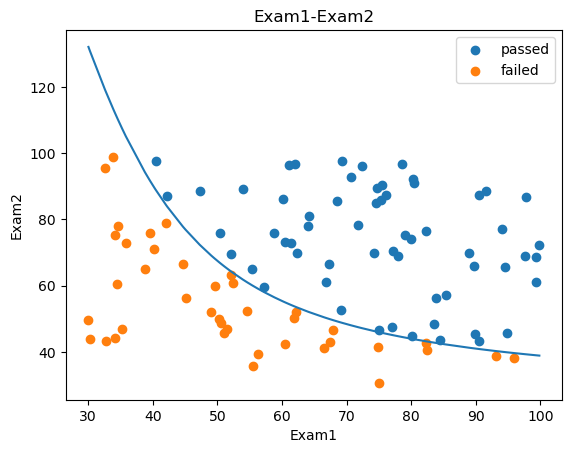

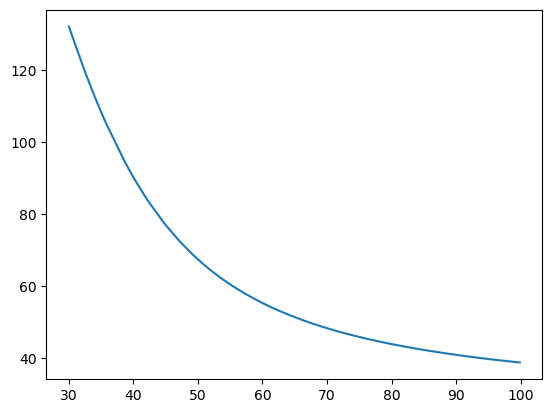

In [64]:
fig5 = plt.figure()  # 创建一个新的图表
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])  # 绘制通过考试的散点图
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])  # 绘制未通过考试的散点图
plt.plot(x1_new , x2_new_boundary)  # 绘制决策边界
plt.title("Exam1-Exam2")  # 设置图表标题
plt.xlabel("Exam1")  # 设置X轴标签
plt.ylabel("Exam2")  # 设置Y轴标签
plt.legend((passed, failed),("passed", "failed"))  # 添加图例
plt.show()  # 显示图表

plt.plot(x1_new , x2_new_boundary)  # 绘制决策边界
plt.show()  # 显示图表

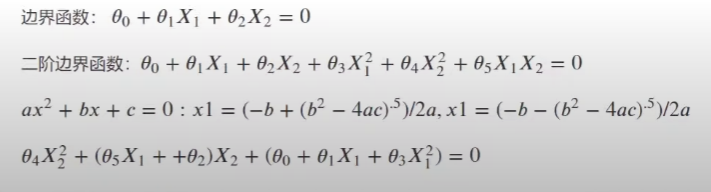

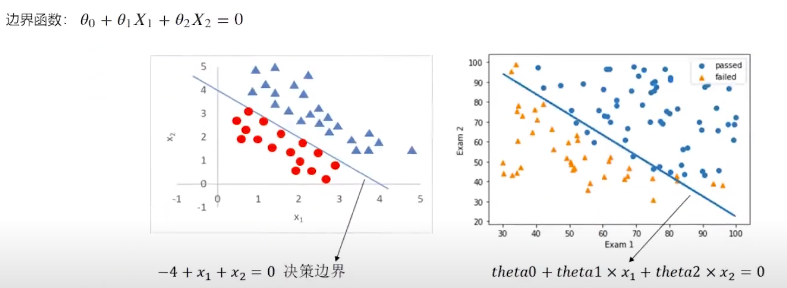

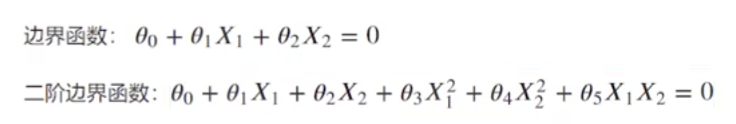